In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/MZ세대 문화여가 활동 특징_20240424.csv')
df.head()

,응답자ID,조사시작일자,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,236099,20240424,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,289713,20240424,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,306059,20240424,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
3,332896,20240424,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남
4,335203,20240424,M,20대,부산광역시,300이상500만원 미만,자기만족-즐거움을 위해,건강 관리를 위해,4,10,40,15,30,15,0,독서,등산 직접 하기,없음,없음,없음


In [2]:
ID = df['응답자ID'].copy()
ID.head(3)

0    236099
1    289713
2    306059
Name: 응답자ID, dtype: int64

In [3]:
df = df.drop(columns=['응답자ID','조사시작일자'])
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음


- 1. 라이브러리 및 데이터 확인
  2. 데이터 탐색(EDA)
  3. 데이터 전처리 및 분리

### 데이터 탐색(EDA)

In [4]:
df.shape

(525, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   성별구분코드          525 non-null    object
 1   연령대구분명          525 non-null    object
 2   답변자거주지역명        525 non-null    object
 3   가구소득정도명         525 non-null    object
 4   레저시간사용목적1순위값    525 non-null    object
 5   레저시간사용목적2순위값    525 non-null    object
 6   평일일평균레저시간값      525 non-null    int64 
 7   주말일평균레저시간값      525 non-null    int64 
 8   레저시간휴식오락사용비율    525 non-null    int64 
 9   레저시간취미사용비율      525 non-null    int64 
 10  레저시간본인계발사용비율    525 non-null    int64 
 11  레저시간대인관계교제사용비율  525 non-null    int64 
 12  레저시간기타사용비율      525 non-null    int64 
 13  관심레저활동1순위값      525 non-null    object
 14  관심레저활동2순위값      525 non-null    object
 15  관심레저활동3순위값      525 non-null    object
 16  관심레저활동4순위값      525 non-null    object
 17  관심레저활동5순위값      525 non-null    object
dtypes: int64(7

In [6]:
df.isnull().sum()

성별구분코드            0
연령대구분명            0
답변자거주지역명          0
가구소득정도명           0
레저시간사용목적1순위값      0
레저시간사용목적2순위값      0
평일일평균레저시간값        0
주말일평균레저시간값        0
레저시간휴식오락사용비율      0
레저시간취미사용비율        0
레저시간본인계발사용비율      0
레저시간대인관계교제사용비율    0
레저시간기타사용비율        0
관심레저활동1순위값        0
관심레저활동2순위값        0
관심레저활동3순위값        0
관심레저활동4순위값        0
관심레저활동5순위값        0
dtype: int64

In [7]:
df.value_counts('연령대구분명')

연령대구분명
50대    123
40대    112
60대    109
30대     94
20대     87
Name: count, dtype: int64

In [8]:
df['연령대구분명']

0      20대
1      20대
2      20대
3      30대
4      20대
      ... 
520    30대
521    20대
522    60대
523    40대
524    20대
Name: 연령대구분명, Length: 525, dtype: object

In [9]:
# 우리 목표인 2030의 응답만 추출
cond20s = (df['연령대구분명']=='20대')
cond30s = (df['연령대구분명']=='30대')
df = df[cond20s | cond30s]
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음


In [10]:
df.value_counts('가구소득정도명')

가구소득정도명
300만원 미만         47
300이상500만원 미만    41
500이상700만원 미만    32
700만원 이상         32
무응답              29
Name: count, dtype: int64

In [11]:
# 우리 서비스의 최종 목표는 은둔형 외톨이들이 자신감을 찾아 일반 직업활동을 하는 것으로 둔다.
# 그렇기 때문에, 현재 소득 300만원 미만의 2030 청년들의 여가활동/문화활동/취미활동이,
# 고립 생활에서 갓 벗어나 평범한 직업활동을 하는 사회 청년이 된 은둔형 외톨이들이 하게 될, 여가활동/문화활동/취미활동이 될 것이다.
condmoney = (df['가구소득정도명']=='300만원 미만')
df = df[condmoney]
df = df.reset_index(drop=True)
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
1,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
2,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남


# 시각화

## 레저시간사용목적 에 대한 분석

In [12]:
df['레저시간사용목적1순위값'].value_counts()

레저시간사용목적1순위값
자기만족-즐거움을 위해           13
스트레스 해소를 위해            11
마음의 안정-휴식을 위해           8
가족-지인 등과 시간을 보내기 위해     5
남는 시간을 보내기 위해           5
대인 관계-교제를 위해            3
자기 계발을 위해               1
건강 관리를 위해               1
Name: count, dtype: int64

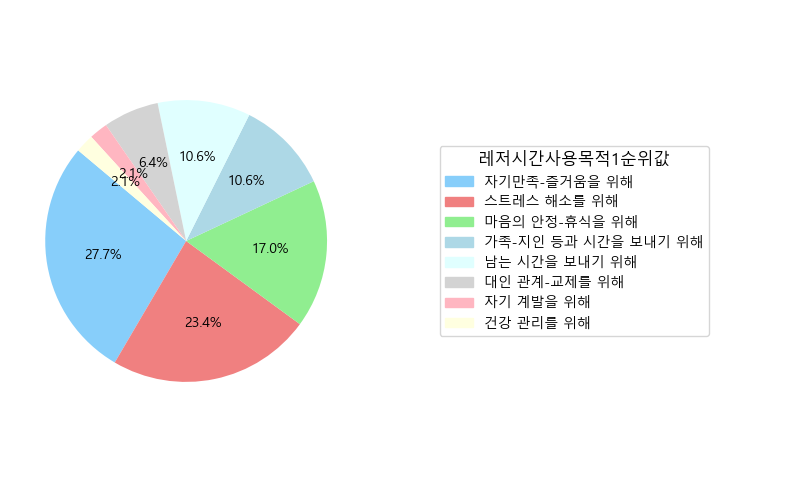

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.patches import Patch

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 시각화를 위한 데이터 준비
labels = df['레저시간사용목적1순위값'].value_counts().index
sizes = df['레저시간사용목적1순위값'].value_counts().values

# 색상 리스트 생성
colors = ['lightskyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightcyan', 'lightgrey', 'lightpink', 'lightyellow']
# 파이차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 파이차트 그리기
patches, _, _ = axs[0].pie(sizes, startangle=140, autopct='%1.1f%%', colors=colors)

# 범례 색상 지정
legend_patches = [Patch(color=color) for color in colors]

# 범례 추가
axs[1].axis('off')
axs[1].legend(legend_patches, labels, loc="center left", title="레저시간사용목적1순위값", title_fontsize='large')

plt.show()

In [14]:
df['레저시간사용목적2순위값'].value_counts()

레저시간사용목적2순위값
가족-지인 등과 시간을 보내기 위해    13
마음의 안정-휴식을 위해           8
스트레스 해소를 위해             7
자기만족-즐거움을 위해            6
자기 계발을 위해               5
없음                      4
건강 관리를 위해               3
남는 시간을 보내기 위해           1
Name: count, dtype: int64

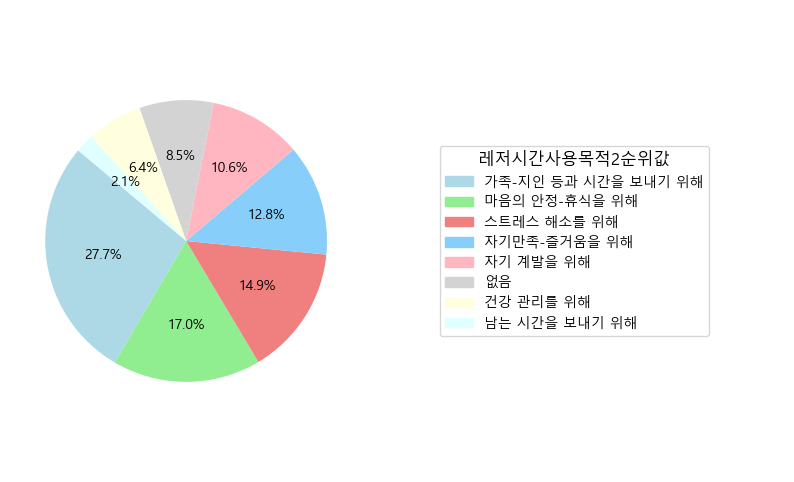

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.patches import Patch

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 시각화를 위한 데이터 준비
labels = df['레저시간사용목적2순위값'].value_counts().index
sizes = df['레저시간사용목적2순위값'].value_counts().values

# 색상 리스트 생성
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgrey', 'lightyellow', 'lightcyan']

# 파이차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 파이차트 그리기
patches, _, _ = axs[0].pie(sizes, startangle=140, autopct='%1.1f%%', colors=colors)

# 범례 색상 지정
legend_patches = [Patch(color=color) for color in colors]

# 범례 추가
axs[1].axis('off')
axs[1].legend(legend_patches, labels, loc="center left", title="레저시간사용목적2순위값", title_fontsize='large')

plt.show()

### 레저시간 사용목적 1&2순위 데이터 간의 관계를 이해하기 위해서 교차 테이블(Cross-tabulation)을 사용하여 두 변수 간의 '빈도'를 비교. 
### 이를 통해 각 투표가 얼마나 많이 발생하는지, 얼마나 자주 함께 발생하는지 등을 확인가능.
### 위 코드를 실행하면 각 레저시간사용목적값의 조합에 대한 빈도를 히트맵으로 시각화. 이를 통해 각 값들 간의 연관성을 파악.

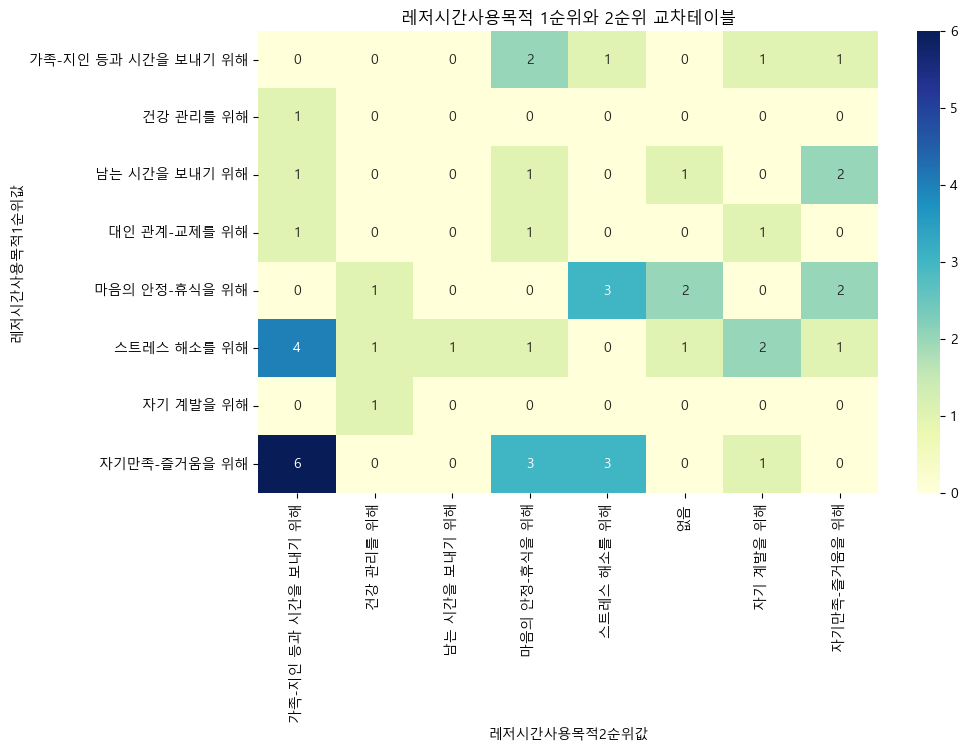

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 레저시간사용목적값에 대한 교차테이블 생성
cross_tab = pd.crosstab(df['레저시간사용목적1순위값'], df['레저시간사용목적2순위값'])

# 히트맵으로 교차테이블 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('레저시간사용목적 1순위와 2순위 교차테이블')
plt.xlabel('레저시간사용목적2순위값')
plt.ylabel('레저시간사용목적1순위값')
plt.show()

### 레저시간 사용목적 1,2순위 결과 :
- 1순위 가장 큰 목적은 레저시간을 자기만족-즐거움을 위해 사용하고,
- 1순위 두번째 큰 목적은 스트레스 해소를 위해 사용한다.

- 2순위 가장 큰 목적은 가족-지인 등과 시간을 보내기 위해 사용하고,
- 2순위 두번째 큰 목적은 마음의 안정-휴식을 위해 사용한다.

### ※ 2030청년들은 여가시간에, 자신들의 즐거움을 채우고 자신이 흥미있는 것을 하며 보낸다. 또한 스트레스를 해소하기 위해서도 사용한다.
### 그것들이 이루어진 후, 가족-지인 등과 시간을 보내거나 마음의 안정-휴식을 찾으며 여가를 보낸다.

In [17]:
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
1,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
2,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남


## 평일/ 주말 의 평균레저시간에 대한 분석

In [18]:
df['평일일평균레저시간값'].value_counts()

평일일평균레저시간값
2     13
3     13
5      7
1      5
4      3
6      2
7      2
10     1
8      1
Name: count, dtype: int64

### 이상치 대체

<Axes: ylabel='평일일평균레저시간값'>

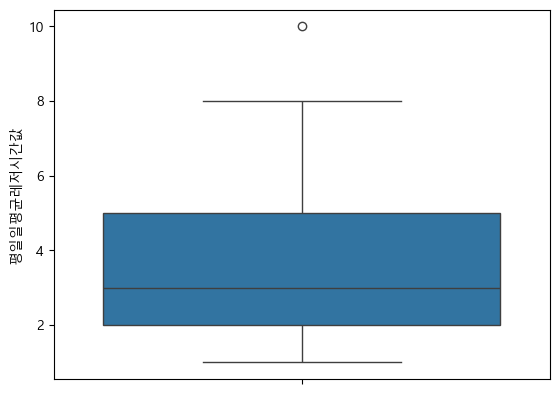

In [37]:
# 이상치 대체
import seaborn as sns

df_weekdays = df['평일일평균레저시간값'].copy()
sns.boxplot(df_weekdays)

In [38]:
df_weekdays.value_counts()

평일일평균레저시간값
2     13
3     13
5      7
1      5
4      3
6      2
7      2
10     1
8      1
Name: count, dtype: int64